In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# constants
lambda_laser = 532e-9 # wavelength of the laser in meters
thickness = 1e-3 # thickness in meters

def N_fit(theta_in,n):
    """Function to fit the refractive index data."""
    theta_in_rad = np.deg2rad(theta_in)
    return ((2*thickness)/lambda_laser) * ( (n**2)/(np.sqrt(n**2-np.sin(theta_in_rad)**2)) - n - np.cos(theta_in_rad) + 1 - (np.sin(theta_in_rad)**(3/2))/n)
def N_fit2(theta_in,n):
    """Alternative function to fit the refractive index data."""
    theta_in_rad = np.deg2rad(theta_in)
    return (2*thickness/lambda_laser) * (np.sqrt(n**2 - np.sin(theta_in_rad)**2) - np.cos(theta_in_rad)+1-n)

In [2]:
theta_measured = np.array([2, 4, 6,8,10,12]) # measured angles in degrees
N_measured = np.array([0,2,5,11,19,27]) # measured N values

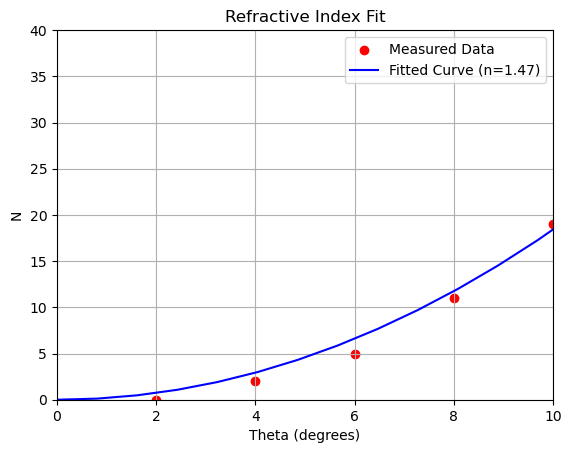

In [3]:
# fit the data
popt, pcov = curve_fit(N_fit2, theta_measured, N_measured , p0=[1.5])
n_fit = popt
theta_fit = np.linspace(0,80,100)
n_line = N_fit2(theta_fit, *n_fit)

# plotting
plt.figure(0)
plt.scatter(theta_measured, N_measured, label='Measured Data', color='red')
plt.plot(theta_fit, n_line, label=f'Fitted Curve (n={n_fit[0]:.2f})', color='blue')
plt.xlabel('Theta (degrees)')
plt.ylabel('N')
plt.title('Refractive Index Fit')
plt.xlim(0,10)
plt.ylim(0,40)          
plt.legend()
plt.grid()

plt.show()